In [58]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [59]:
data = np.load("D://M_AI//Advance Deep Learning and Computer Vision//Datasets//ORL_faces.npz")

#load the train images and label images
X_train = data['trainX']
X_test = data['testX']
Y_train = data['trainY']
Y_test = data['testY']

#Normalize the images
X_train = np.array(X_train,dtype='float32')/255
X_test = np.array(X_test,dtype='float32')/255

# show the train and test Data format
print('X_train shape : {}'.format(X_train.shape))
print('Y_train shape: {}'.format(Y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape : (240, 10304)
Y_train shape: (240,)
X_test shape: (160, 10304)


In [60]:
#Split the data set
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,random_state=None,test_size=0.05)

In [61]:
#Transform the images to equal sizes
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)
#X_valid = X_valid.reshape(X_valid.shape[0], *im_shape)

print('X_train shape: {}'.format(X_train.shape[0]))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: 228
X_test shape: (12, 112, 92, 1)


In [62]:
#Build the CNN Model
model = Sequential()
model.add(Conv2D(36,(7,7), activation='relu', input_shape=im_shape))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(54,(5,5), activation='relu', input_shape=im_shape))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(2024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])



In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 2024)              49841000  
_________________________________________________________________
dropout_18 (Dropout)         (None, 2024)             

In [64]:
#Train the model
history = model.fit(X_train, Y_train,
          epochs=200, 
          batch_size = 512,
          validation_data = (X_test,Y_test),
          verbose=2)

Epoch 1/200
1/1 - 2s - loss: 3.0237 - accuracy: 0.0263 - val_loss: 3.0099 - val_accuracy: 0.0833
Epoch 2/200
1/1 - 2s - loss: 3.0158 - accuracy: 0.0526 - val_loss: 3.0067 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 - 2s - loss: 3.0126 - accuracy: 0.0526 - val_loss: 3.0062 - val_accuracy: 0.0833
Epoch 4/200
1/1 - 2s - loss: 2.9888 - accuracy: 0.0702 - val_loss: 3.0044 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 - 2s - loss: 3.0075 - accuracy: 0.0439 - val_loss: 3.0072 - val_accuracy: 0.0000e+00
Epoch 6/200
1/1 - 3s - loss: 2.9980 - accuracy: 0.0395 - val_loss: 3.0057 - val_accuracy: 0.0000e+00
Epoch 7/200
1/1 - 3s - loss: 2.9929 - accuracy: 0.0570 - val_loss: 3.0053 - val_accuracy: 0.0000e+00
Epoch 8/200
1/1 - 2s - loss: 2.9990 - accuracy: 0.0482 - val_loss: 3.0042 - val_accuracy: 0.0000e+00
Epoch 9/200
1/1 - 2s - loss: 3.0122 - accuracy: 0.0526 - val_loss: 3.0009 - val_accuracy: 0.0000e+00
Epoch 10/200
1/1 - 2s - loss: 2.9857 - accuracy: 0.0702 - val_loss: 2.9979 - val_accuracy: 0.0000e+

Epoch 85/200
1/1 - 2s - loss: 0.5728 - accuracy: 0.8202 - val_loss: 0.2118 - val_accuracy: 1.0000
Epoch 86/200
1/1 - 2s - loss: 0.4392 - accuracy: 0.8816 - val_loss: 0.1999 - val_accuracy: 1.0000
Epoch 87/200
1/1 - 2s - loss: 0.3696 - accuracy: 0.9123 - val_loss: 0.1912 - val_accuracy: 1.0000
Epoch 88/200
1/1 - 2s - loss: 0.4257 - accuracy: 0.8553 - val_loss: 0.1761 - val_accuracy: 1.0000
Epoch 89/200
1/1 - 2s - loss: 0.4460 - accuracy: 0.8816 - val_loss: 0.1597 - val_accuracy: 1.0000
Epoch 90/200
1/1 - 2s - loss: 0.4327 - accuracy: 0.8596 - val_loss: 0.1507 - val_accuracy: 1.0000
Epoch 91/200
1/1 - 2s - loss: 0.3670 - accuracy: 0.8947 - val_loss: 0.1413 - val_accuracy: 1.0000
Epoch 92/200
1/1 - 2s - loss: 0.3424 - accuracy: 0.9123 - val_loss: 0.1286 - val_accuracy: 1.0000
Epoch 93/200
1/1 - 3s - loss: 0.3705 - accuracy: 0.8904 - val_loss: 0.1198 - val_accuracy: 1.0000
Epoch 94/200
1/1 - 4s - loss: 0.3287 - accuracy: 0.9035 - val_loss: 0.1136 - val_accuracy: 1.0000
Epoch 95/200
1/1 - 2

Epoch 168/200
1/1 - 2s - loss: 0.0302 - accuracy: 0.9912 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 169/200
1/1 - 4s - loss: 0.0304 - accuracy: 0.9956 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 170/200
1/1 - 2s - loss: 0.0230 - accuracy: 0.9956 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 171/200
1/1 - 2s - loss: 0.0289 - accuracy: 0.9956 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 172/200
1/1 - 2s - loss: 0.0295 - accuracy: 0.9956 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 173/200
1/1 - 2s - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 174/200
1/1 - 2s - loss: 0.0374 - accuracy: 0.9956 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 175/200
1/1 - 2s - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 176/200
1/1 - 2s - loss: 0.0308 - accuracy: 0.9956 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 177/200
1/1 - 2s - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 178/

In [65]:
#Evalute test data
score = model.evaluate(X_test,Y_test,verbose=0)
print('test loss {:.4f} and test accuracy {:.4f}'.format(score[0],score[1]))

test loss 0.0110 and test accuracy 1.0000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


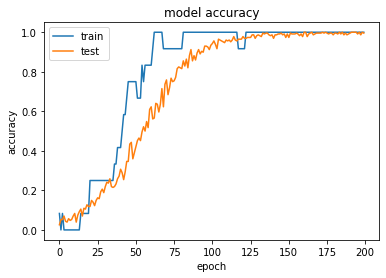

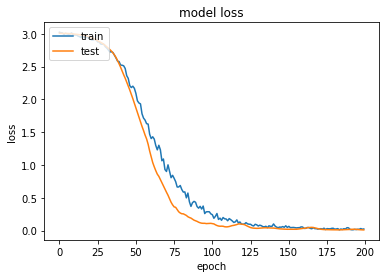

In [66]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1.0
[[1 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



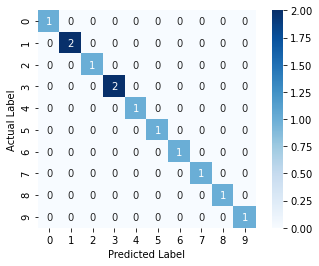

In [77]:
#Prediction and Analysis

predicted = model.predict(X_test)
y_new = model.predict_classes(X_test)

#Model Accuracy
model_accuracy = accuracy_score(Y_test,y_new)
print(model_accuracy)

#Confusion matrix
cnf_matrix = confusion_matrix(Y_test,y_new)
print(cnf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(cnf_matrix,square=True,cmap="Blues", annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

#Classification report
print(classification_report(Y_test,y_new))